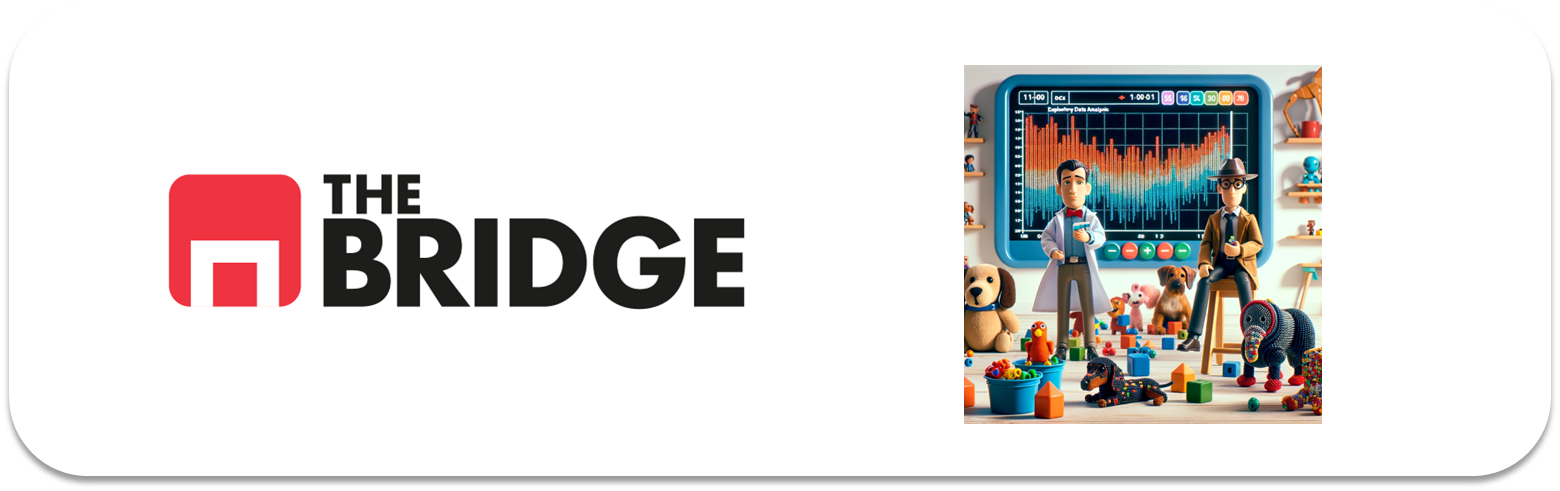

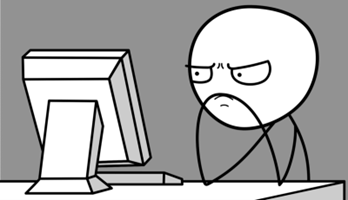

Para ejercitarte y afianzar lo aprendido sobre análisis multivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import *

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
df_admisiones = pd.read_csv("./data/admission_data.csv")
df_admisiones.drop(columns="Unnamed: 0", inplace=True)
df_admisiones

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,Department of Mechanical Engineering,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


### Ejercicio 2

Realiza los análisis multivariante que consideres necesarios para contestar apoyándote en los datos a las preguntas: ¿Existe algún departamenteo específico donde pudieramos hablar de discriminación?¿Están estos resultados en consonancia con lo obtenido en el análisis bivariante de admisiones y género? 

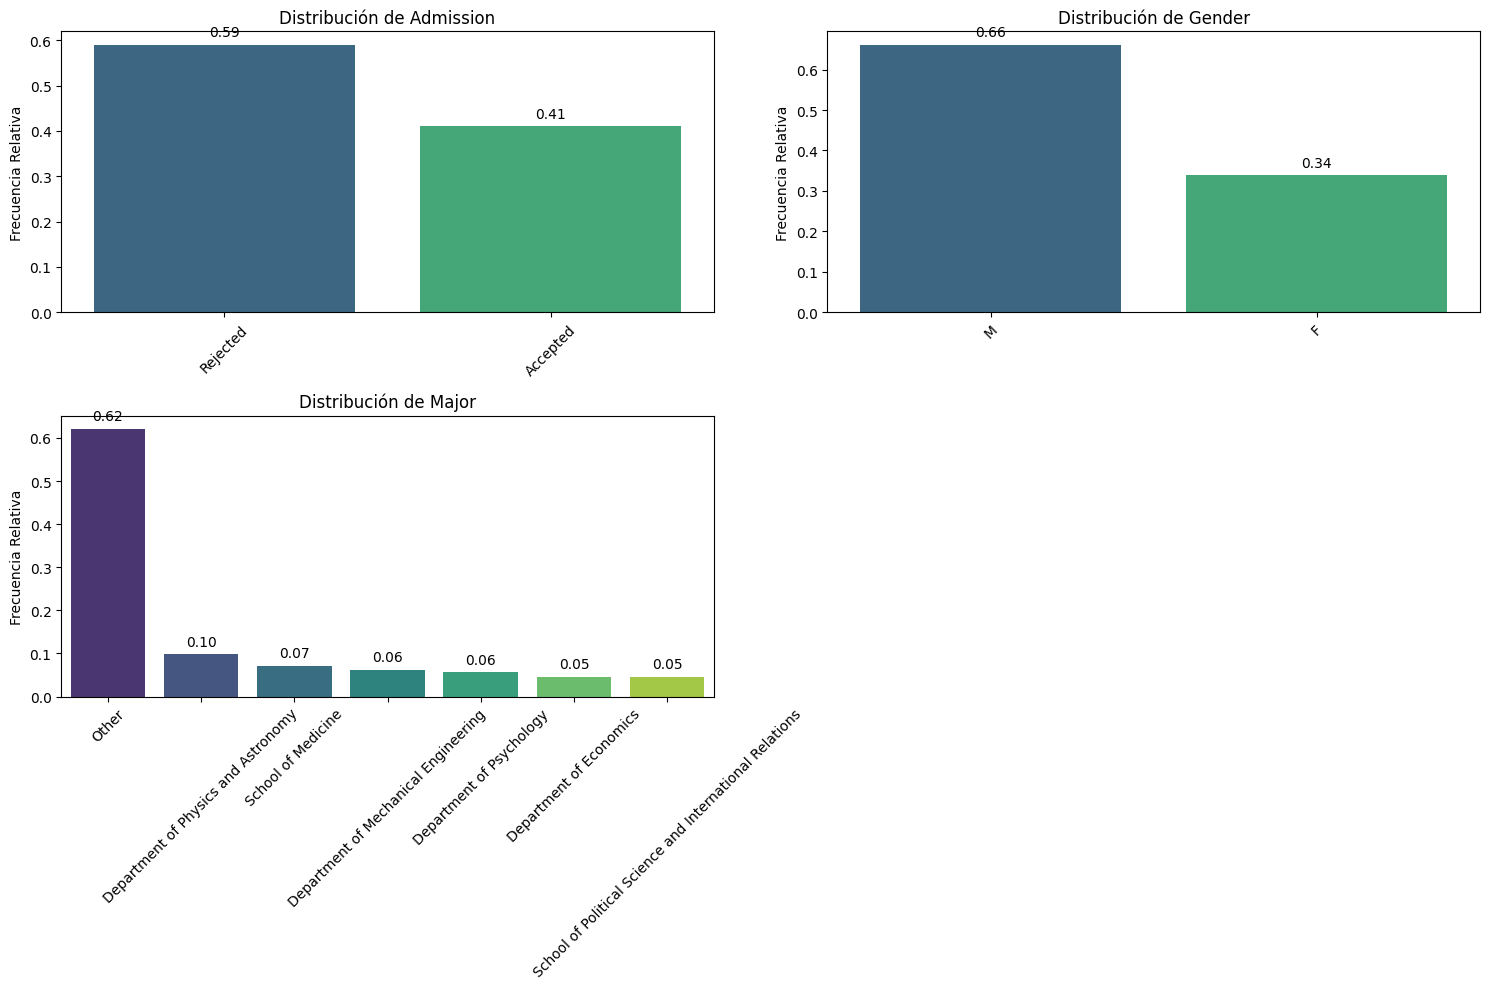

In [4]:
# 0 pintamos los valores iniciales
pinta_distribucion_categoricas(df_admisiones, ["Admission", "Gender", "Major"], relativa=True, mostrar_valores=True)

In [5]:
#1 Escojo la variable directora que es "Admission"


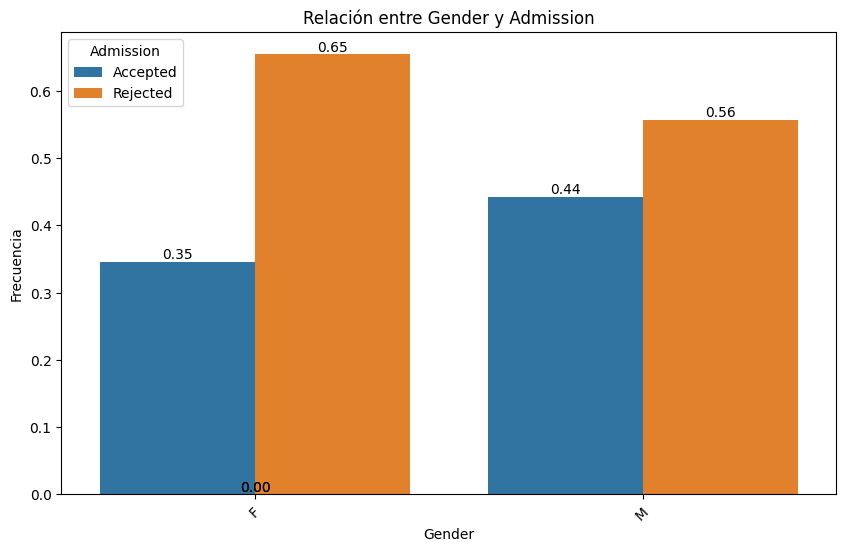

In [6]:
#2Muestro el bivarieante de cada una con las otras 2
plot_categorical_relationship_fin(df_admisiones, "Gender", "Admission", relative_freq=True, show_values=True)

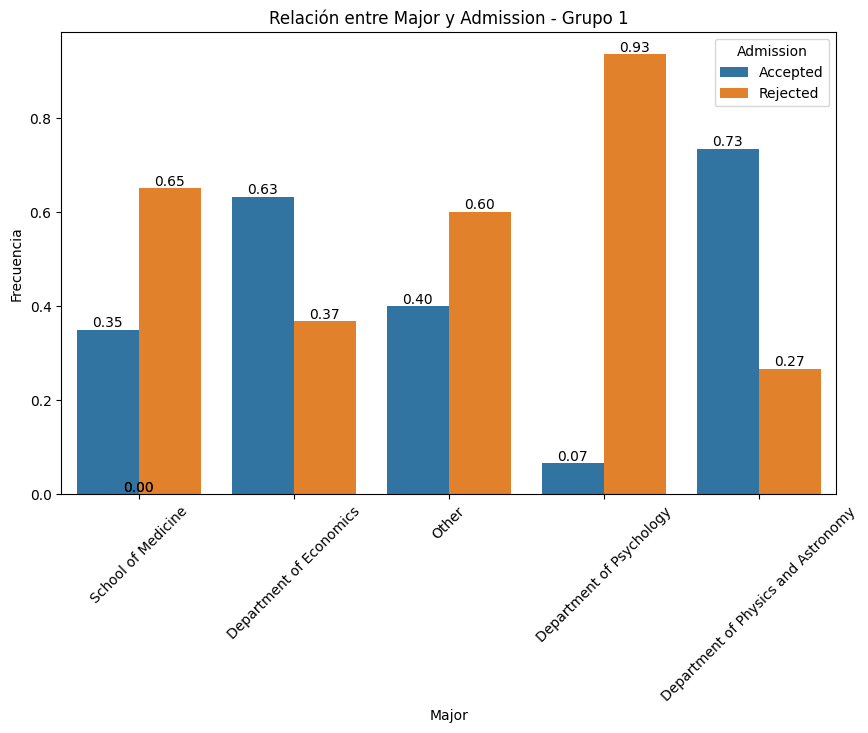

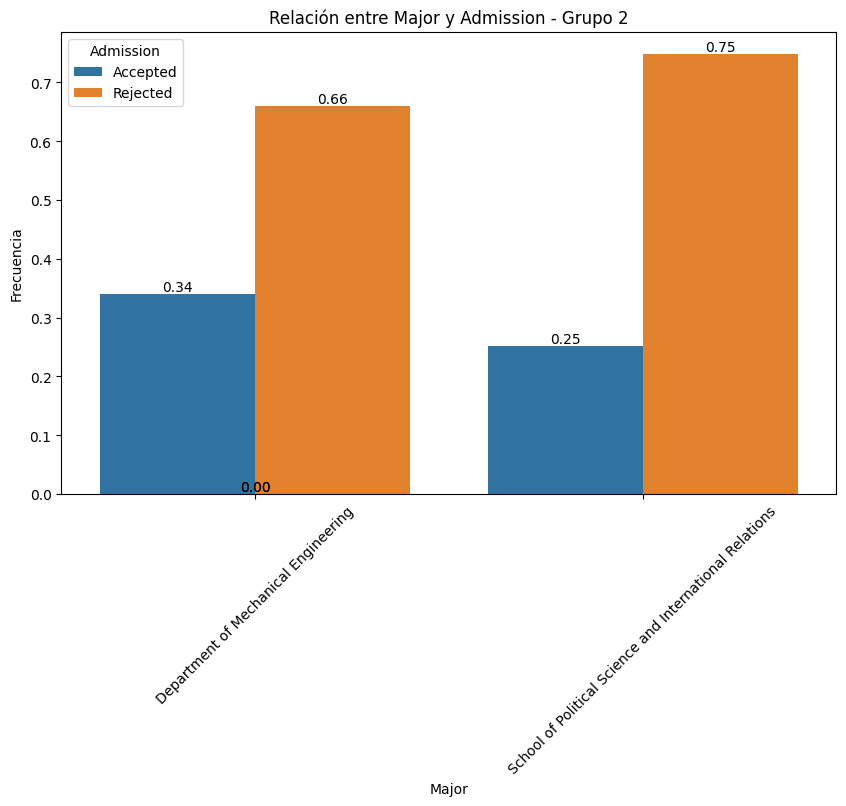

In [7]:
plot_categorical_relationship_fin(df_admisiones, "Major", "Admission", relative_freq=True, show_values=True)

In [8]:
#3 Divido el dataset en tantos subdatasets como valores de mi categorica director.

columnas = ["Admission", "Gender", "Major"]
col_directora = "Admission"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_admisiones[col_directora].unique():
    diccionario_multivariante[valor] = df_admisiones.loc[df_admisiones[col_directora] == valor,[col_2, col_1]]

Respuesta Rejected:


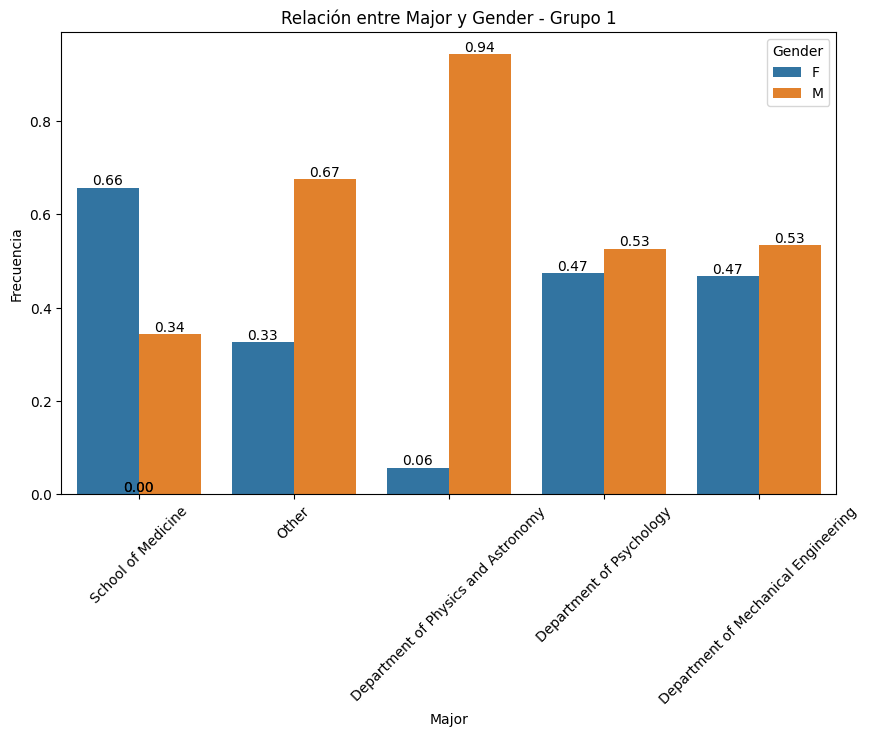

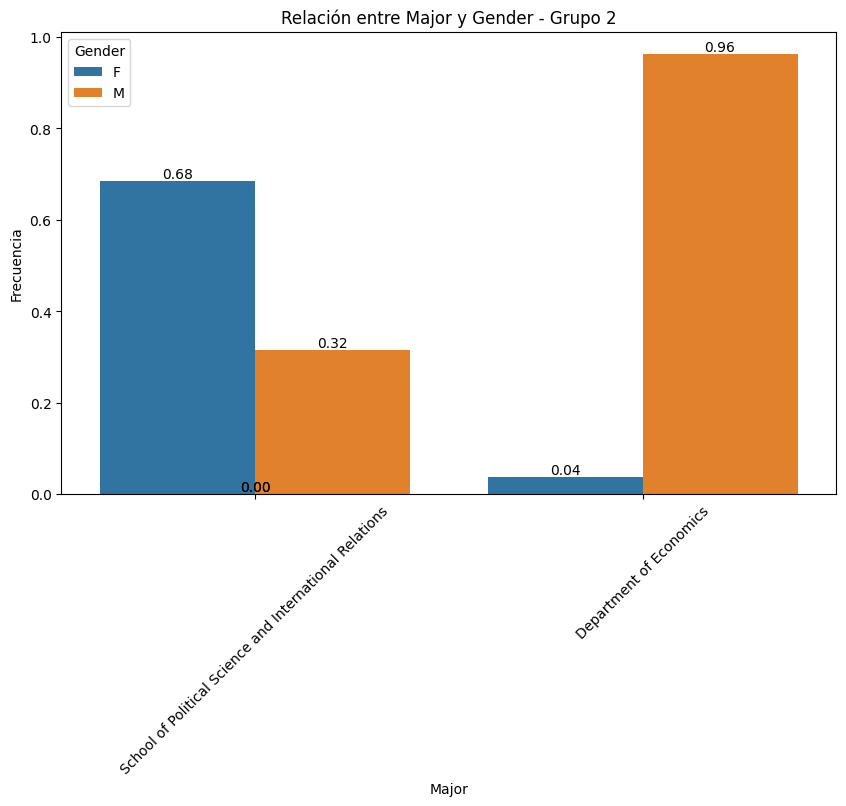

Respuesta Accepted:


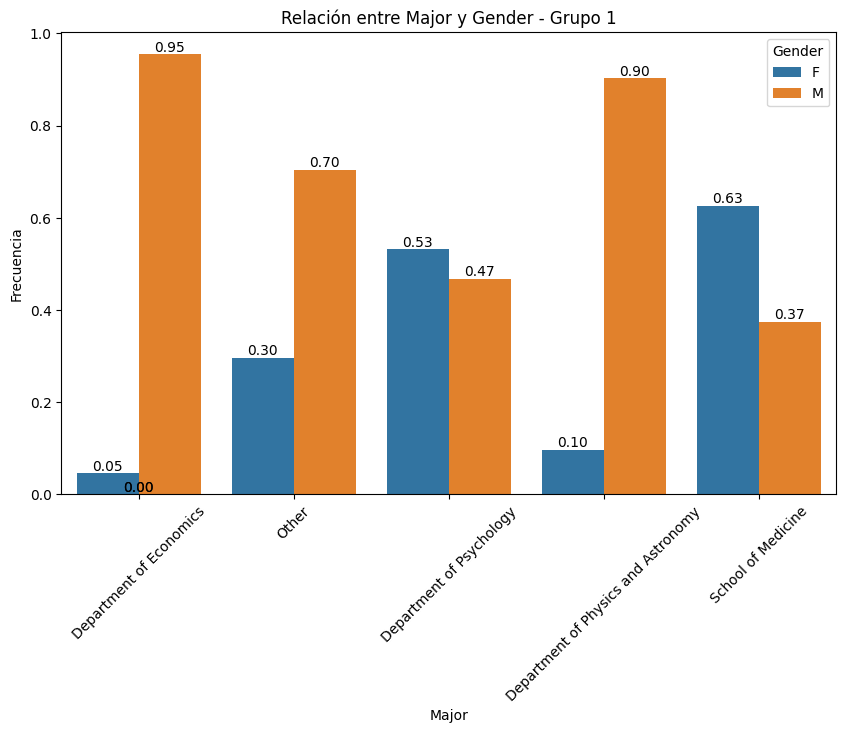

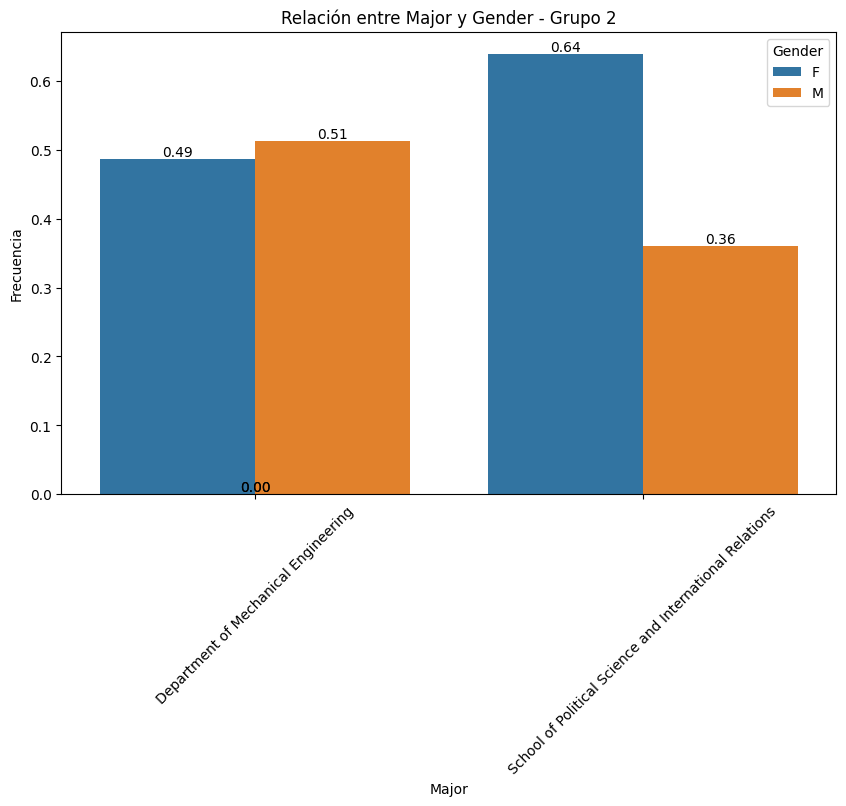

In [9]:
#4 Hago el analisis bivariante
for valor, df_admisiones in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_admisiones, col_2, col_1, relative_freq=True, show_values=True)

### Ejercicio 3

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [12]:
df_tip = pd.read_csv("./data/tips.csv")
df_tip.drop(columns="Unnamed: 0", inplace=True)
df_tip


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 4

Carga el dataset de accidentes que conoces de la unidad anterior y que se encuentra en la ruta "./data/car_crashes.csv", deshazte de las columnas innecesarias y renombra la que contiene las iniciales de los estados a "state"

In [22]:
df_car = pd.read_csv("./data/car_crashes.csv", sep="|")
df_car.drop(columns= "Unnamed: 0", inplace=True)
df_car.rename(columns={"abbrev":"state"}, inplace=True)
df_car.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Ejercicio 5

Realiza una análisis de todas las posibles correlaciones dos a dos, de forma numérica primero y luego empleado un heatmap y un pairplot de seaborn. ¿Qué variables tienen o aparentemente tienen una mayor correlación con "total?

(7, 2)


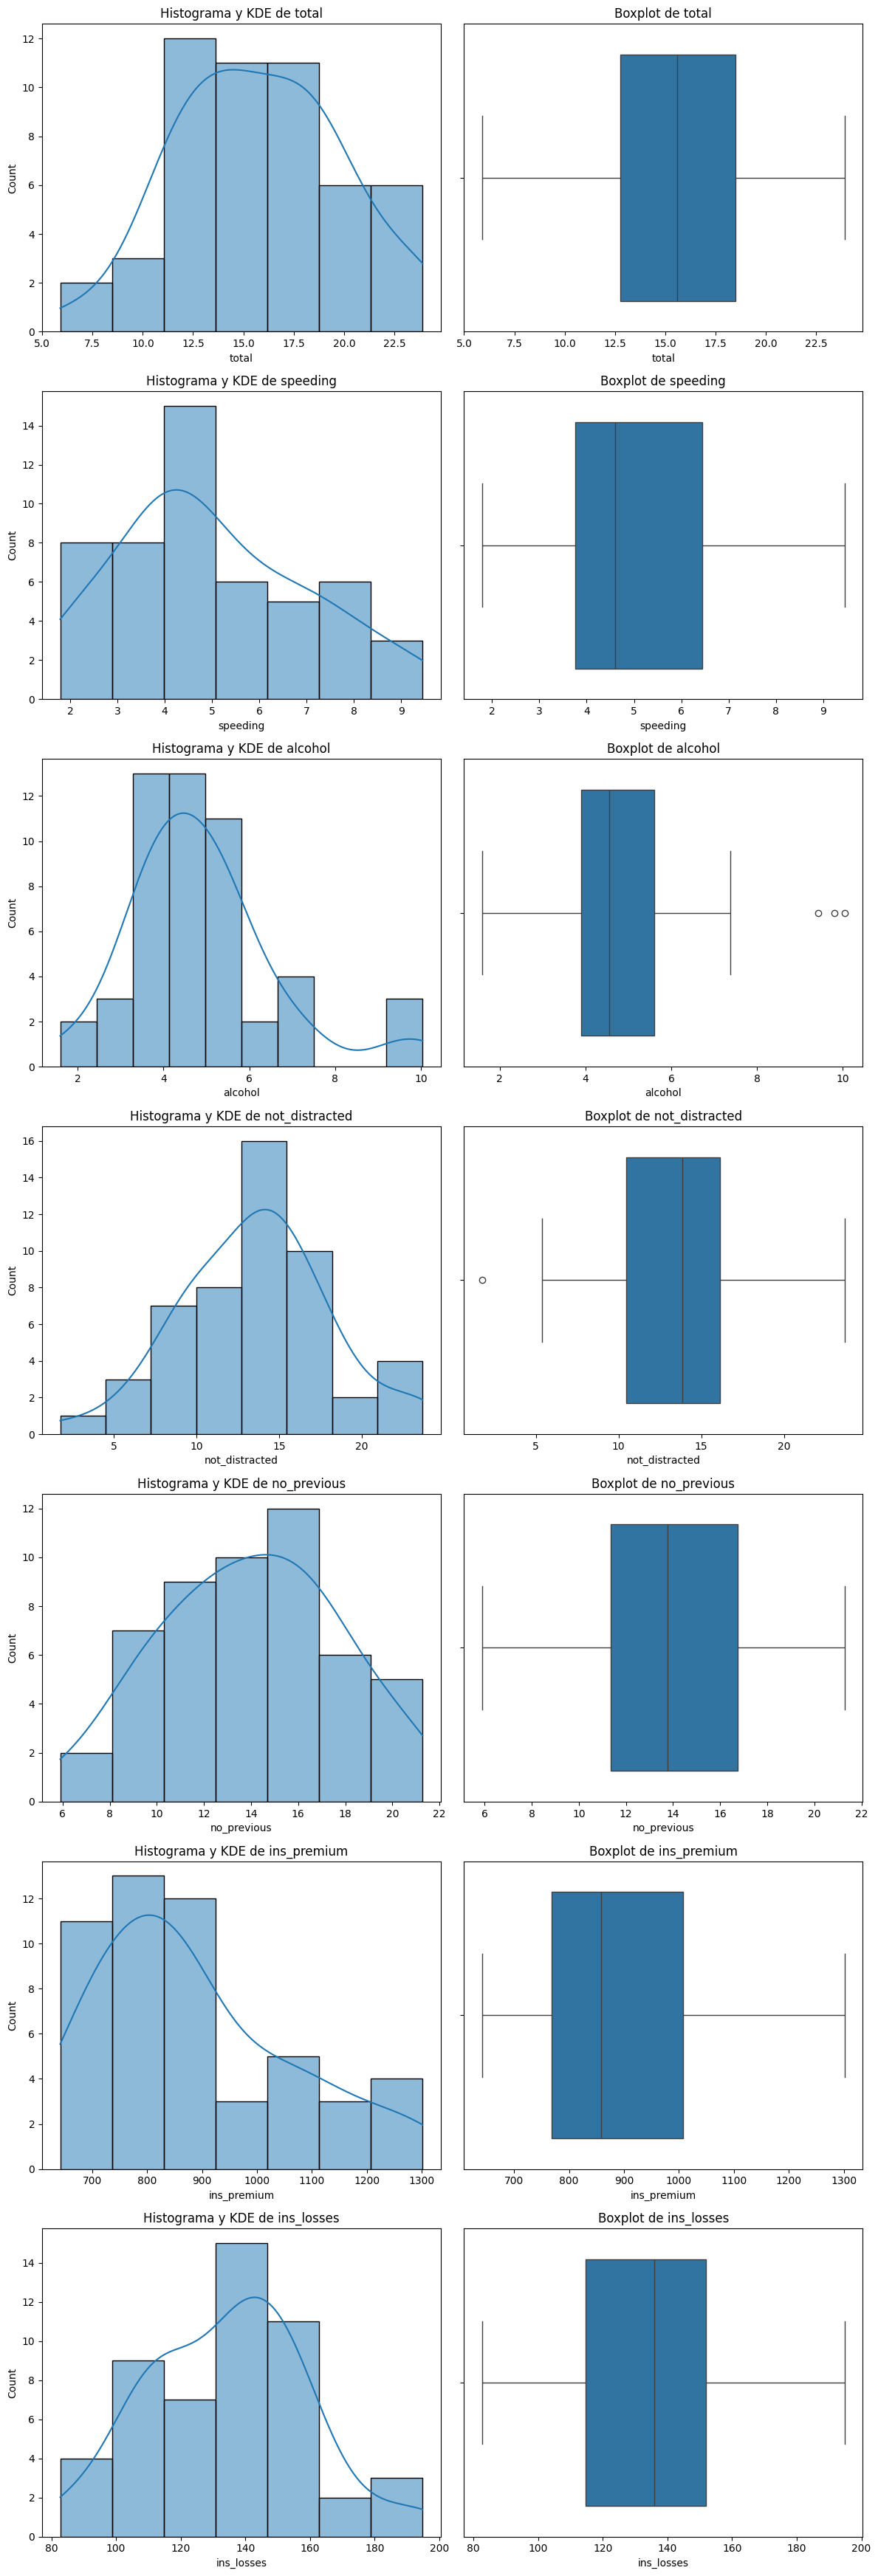

In [25]:
#Como tenemos una categorica y varias numericas
plot_combined_graphs(df_car, ["total", "speeding", "alcohol", "not_distracted", "no_previous", "ins_premium", "ins_losses"])

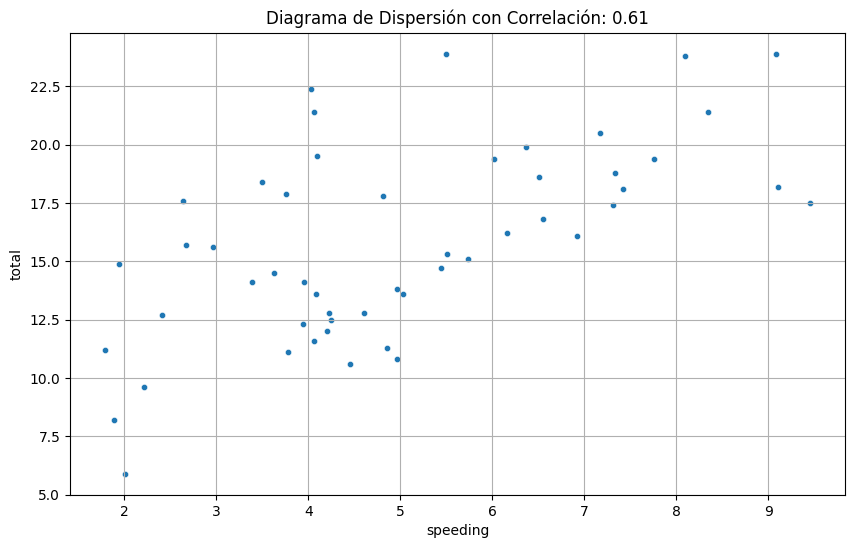

In [26]:
grafico_dispersion_con_correlacion(df_car, "speeding", "total", mostrar_correlacion=True, tamano_puntos=20)

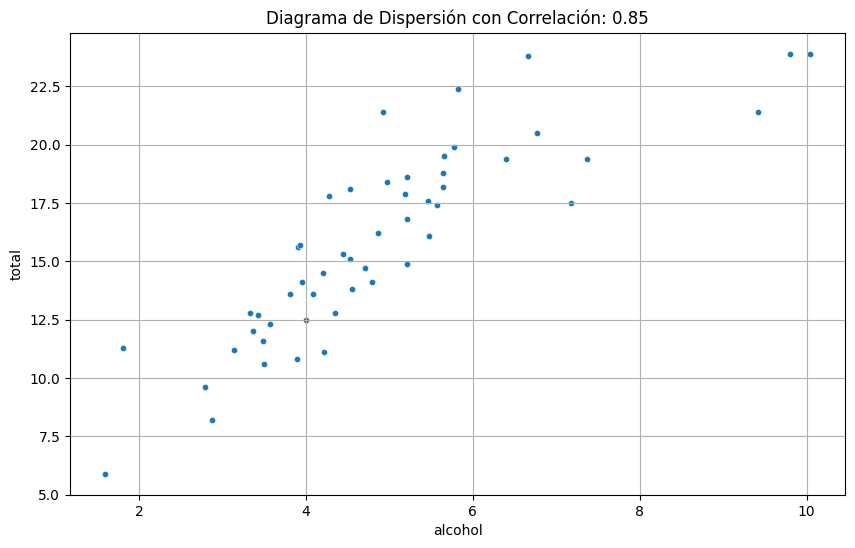

In [27]:
grafico_dispersion_con_correlacion(df_car, "alcohol", "total", mostrar_correlacion=True, tamano_puntos=20)

### Ejercicio 6

Realiza un análisis multivariante entre las variables numéricas "total", "alcohol", "speeding". ¿Puedes sacar alguna conclusión interesante?

In [29]:
corr_matrix = df_car.corr(numeric_only=True)
corr_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


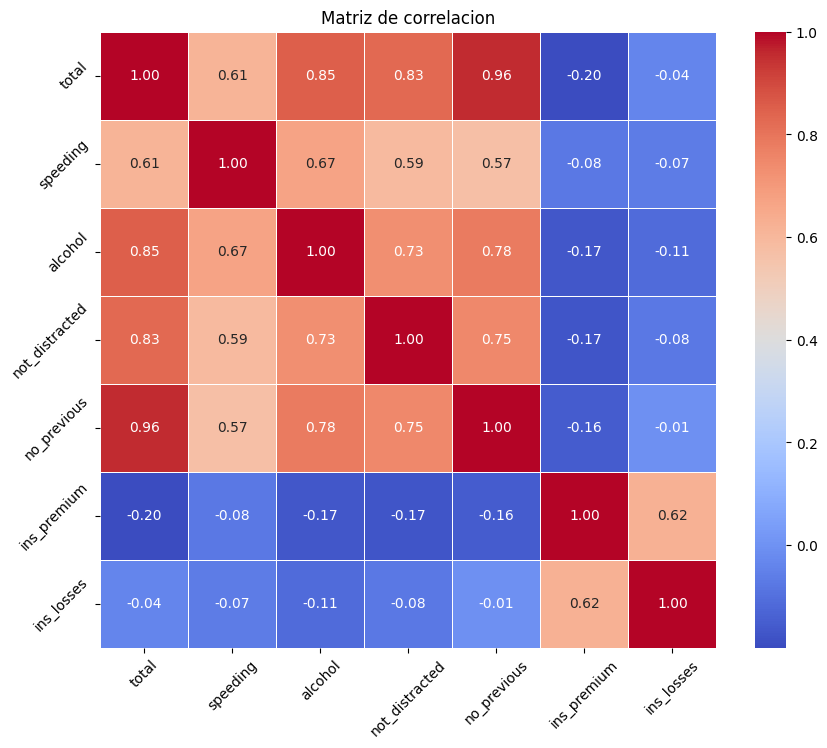

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",cbar=True, square=True, linewidths=.5)
plt.title("Matriz de correlacion")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [34]:
df_solo_numeros = df_car.select_dtypes(include=["float", "int"])
df_solo_numeros.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

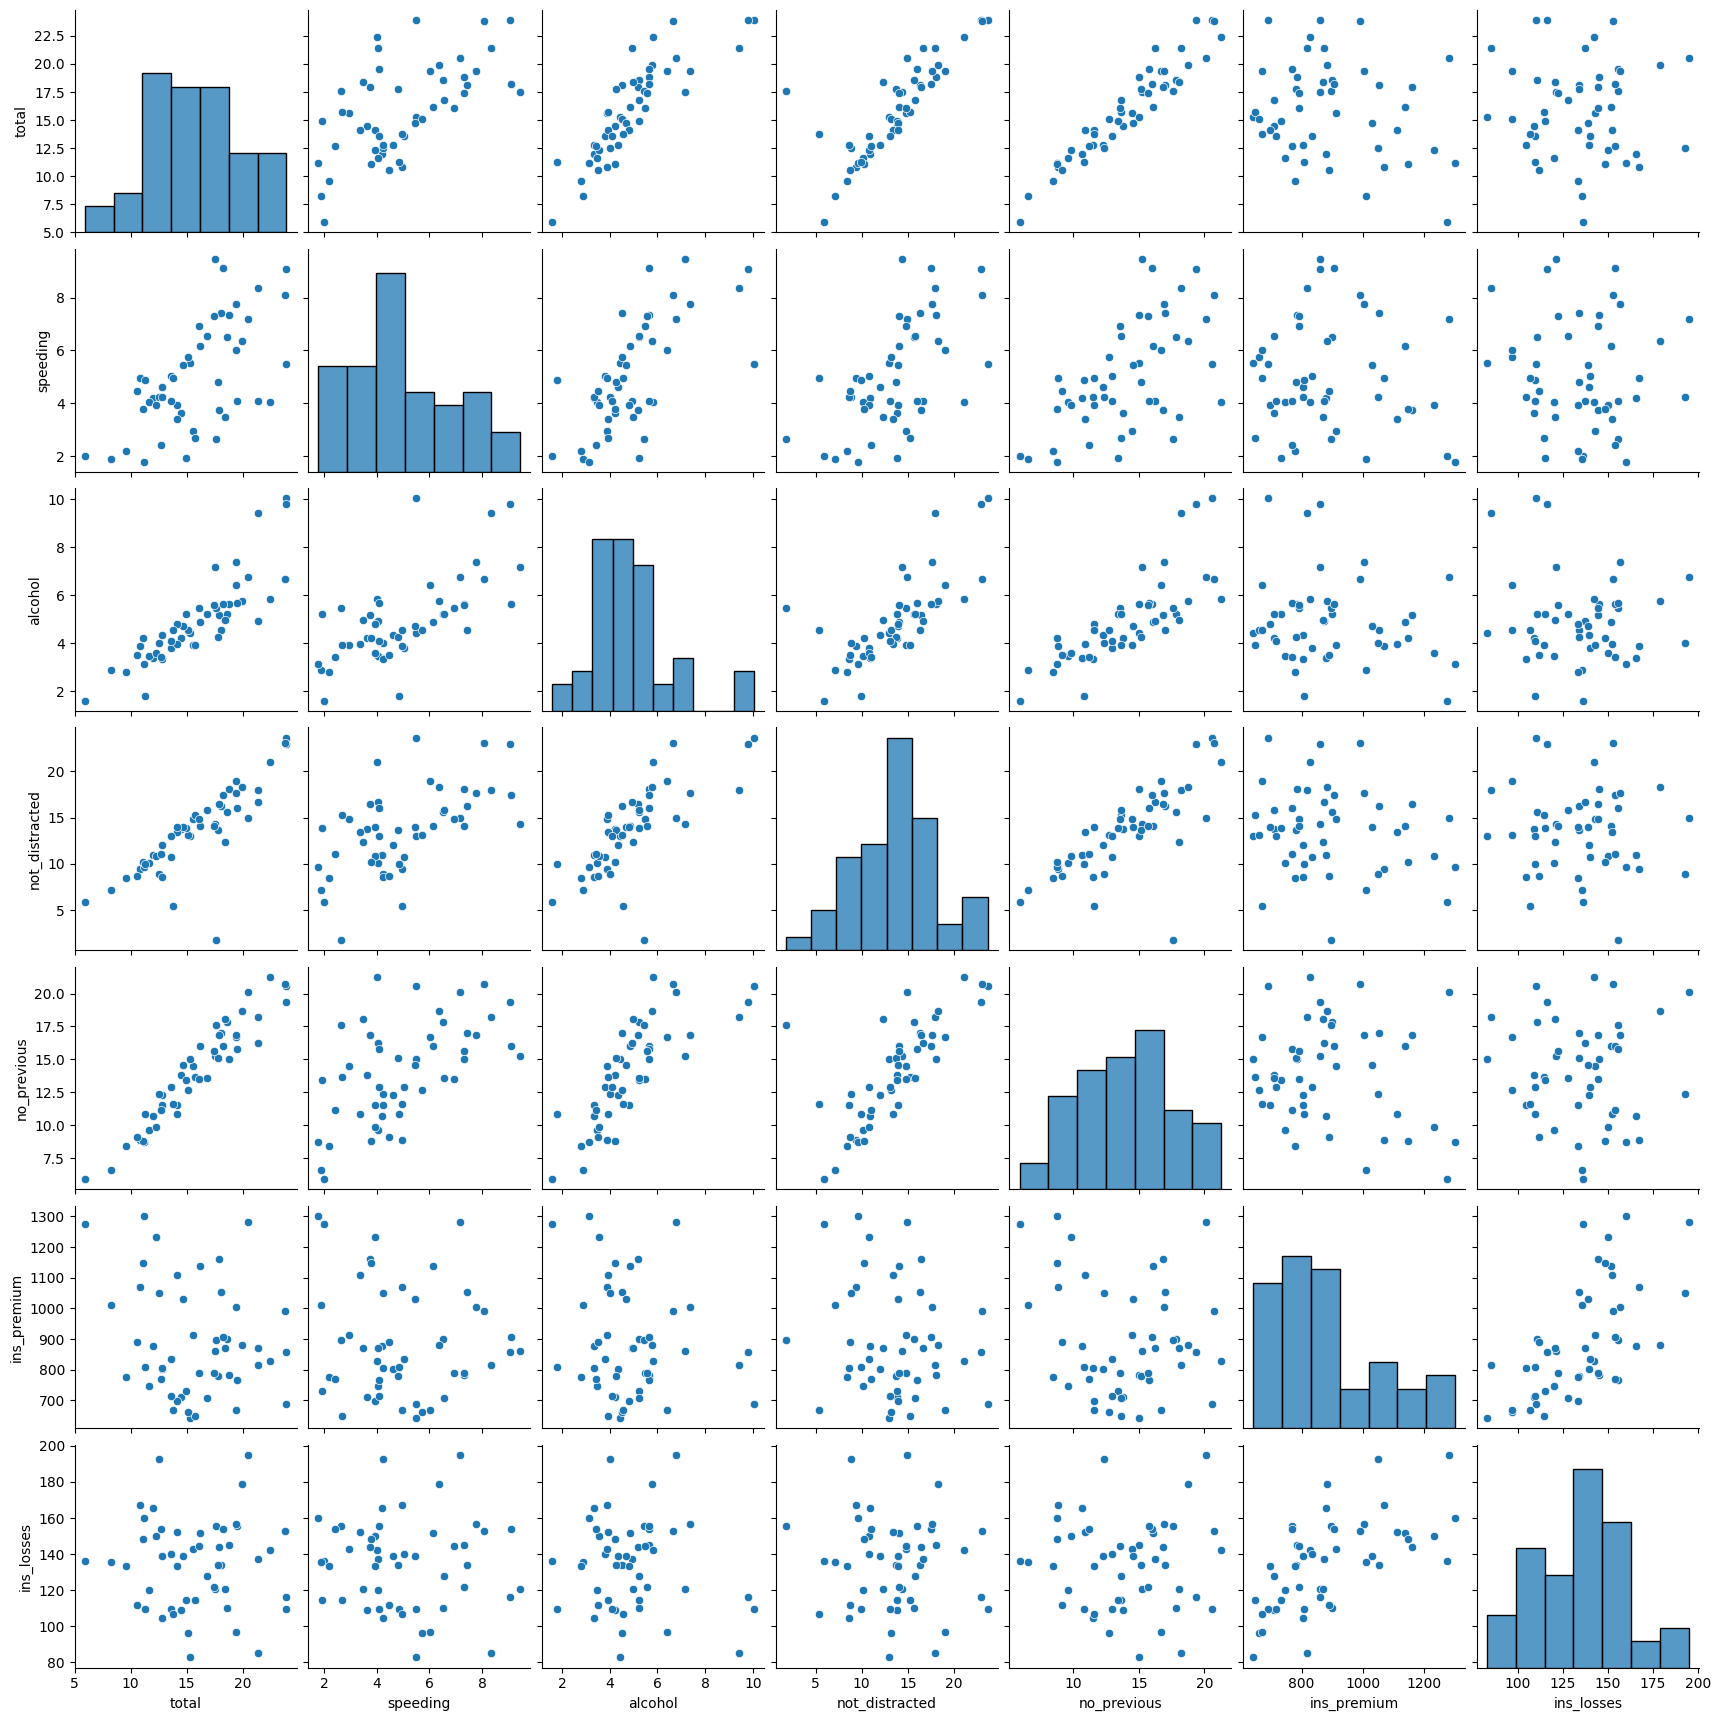

In [35]:
sns.pairplot(df_solo_numeros)
plt.show()